# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Sheriffdeen Abatan

<br>

## Please show and display ALL your calculations and results.


In [44]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

!pip install wordcloud


# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import transformers
from transformers import pipeline

import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

Documentation of the Analysis and Objectives

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

In [2]:
df = pd.read_csv("Ulta Skincare Reviews.csv")

In [3]:
df.head(5)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [4]:
# Check the data types of the columns

print(df.dtypes)

Review_Title        object
Review_Text         object
Verified_Buyer      object
Review_Date         object
Review_Location     object
Review_Upvotes       int64
Review_Downvotes     int64
Product             object
Brand               object
Scrape_Date         object
dtype: object


In [5]:
# Checking for duplicates

df.duplicated().sum()

456

In [6]:
# Define a function to convert "X days/months ago" to a datetime format


def convert_date_string(date_string):
    today = datetime.today()
    if "day" in date_string:
        days_ago = int(date_string.split()[0])
        date = today - timedelta(days=days_ago)
    elif "month" in date_string:
        months_ago = int(date_string.split()[0])
        date = today - timedelta(days=months_ago * 30)
    else:
        date = None
    return date


# Apply the function to the Review_Date column

df["Review_Date"] = df["Review_Date"].apply(convert_date_string)

In [7]:
# Check the number of unique products and brands

print("Number of unique products:", df["Product"].nunique())
print("Number of unique brands:", df["Brand"].nunique())

Number of unique products: 4
Number of unique brands: 1


In [8]:
# Check the number of verified buyers

print("Number of verified buyers:", df["Verified_Buyer"].value_counts()[1])

Number of verified buyers: 1249


In [9]:
# Compute the average number of upvotes and downvotes per review

avg_upvotes = df["Review_Upvotes"].mean()
avg_downvotes = df["Review_Downvotes"].mean()
print("Average number of upvotes per review:", avg_upvotes)
print("Average number of downvotes per review:", avg_downvotes)

Average number of upvotes per review: 0.5913253012048193
Average number of downvotes per review: 0.16120481927710845


In [10]:
# Check the most common review titles

print("Most common review titles:\n", df["Review_Title"].value_counts().head())

Most common review titles:
 Amazing product                    95
Love this mask                     90
It's hydrating                     89
Would absolutely buy this again    89
Buy it!                            89
Name: Review_Title, dtype: int64


In [11]:
# Convert the "Review_Text" column to strings, replacing NaN values with empty strings

df["Review_Text"] = df["Review_Text"].fillna("")

# Check the most common review text words

review_text_words = " ".join(df["Review_Text"]).split()
review_text_word_counts = pd.Series(review_text_words).value_counts()
print("Most common review text words:\n", review_text_word_counts.head())

Most common review text words:
 I      8110
and    7304
my     5457
a      4793
the    4737
dtype: int64


In [12]:
# Checking the product column

df["Product"].unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

In [13]:
# Checking for missing values in the data

df.isna().sum()

Review_Title           0
Review_Text            0
Verified_Buyer         0
Review_Date         3446
Review_Location        1
Review_Upvotes         0
Review_Downvotes       0
Product                0
Brand                  0
Scrape_Date            0
dtype: int64

In [14]:
# Filing the missing values

df.fillna("NULL", inplace=True)

In [15]:
# Checking for missing values in the data

df.isna().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [16]:
# Checking the description summary of the dataset.

df.describe()

,Review_Upvotes,Review_Downvotes
count,4150.000000,4150.000000
mean,0.591325,0.161205
std,2.210041,0.912561
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,84.000000,35.000000


In [17]:
# Dropping the unnecessary columns
col_to_drp = [
    "Review_Date",
    "Review_Location",
    "Brand",
    "Scrape_Date",
]
df.drop(columns=col_to_drp, inplace=True)
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Upvotes,Review_Downvotes,Product
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,0,0,Multi-Vitamin Thermafoliant
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,0,0,Multi-Vitamin Thermafoliant
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,0,0,Multi-Vitamin Thermafoliant
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,0,0,Multi-Vitamin Thermafoliant
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,0,0,Multi-Vitamin Thermafoliant


In [18]:
# Checking for duplicates

df.duplicated().sum()

459

In [19]:
# Dropping duplicates

df.drop_duplicates(inplace=True, keep="first")

In [20]:
# Dictionary of English Contractions
contractions_dict = {
    "ain't": "are not",
    "'s": " is",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "that'd": "that would",
    "that'd've": "that would have",
    "there'd": "there would",
    "there'd've": "there would have",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who've": "who have",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}

# Regular expression for finding contractions
contractions_re = re.compile("(%s)" % "|".join(contractions_dict.keys()))


# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]

    return contractions_re.sub(replace, text)


# Expanding Contractions in the reviews
df["Review_Text"] = df["Review_Text"].apply(lambda x: expand_contractions(x))
df["Review_Title"] = df["Review_Title"].apply(lambda x: expand_contractions(x))

In [21]:
# converting text to lowercase

df["Cleaned_Review_Text"] = df["Review_Text"].apply(lambda x: x.lower())
df["Review_Title"] = df["Review_Title"].apply(lambda x: x.lower())

In [22]:
# Removing the digits and words with digit

df["Cleaned_Review_Text"] = df["Cleaned_Review_Text"].apply(
    lambda x: re.sub("\w*\d\w*", "", x)
)
df["Review_Title"] = df["Review_Title"].apply(lambda x: re.sub("\w*\d\w*", "", x))

In [23]:
# Removing the punctuation marks

import string

df["Cleaned_Review_Text"] = df["Cleaned_Review_Text"].apply(
    lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ", x)
)
df["Review_Title"] = df["Review_Title"].apply(
    lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ", x)
)

In [24]:
# Removing extra spaces

df["Cleaned_Review_Text"] = df["Cleaned_Review_Text"].apply(
    lambda x: re.sub(" +", " ", x)
)
df["Review_Title"] = df["Review_Title"].apply(lambda x: re.sub(" +", " ", x))

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

# Removing the stopwords and lemmatizing
df["Cleaned_Review_Text"] = df["Cleaned_Review_Text"].apply(
    lambda x: " ".join(
        [token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]
    )
)

df["Review_Title"] = df["Review_Title"].apply(
    lambda x: " ".join(
        [token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]
    )
)

In [27]:
# Grouping the product with the review text and title.

df_grouped = (
    df[["Product", "Review_Title", "Cleaned_Review_Text"]]
    .groupby(by="Product")
    .agg(lambda x: " ".join(x))
)
df_grouped.head()

,Review_Title,Cleaned_Review_Text
Product,,
Daily Microfoliant,i will be purchasing this exfoliate again not worth it the one i love this stuff is amazing good but will make you purge great product did wonders for me i will not be without it don t love new favorite this works for me definitely recommend perfect addition to my skincare routine expensive but i love it my go to holy grail works good will buy all the time staple in my skincare routine wow pretty good but not worth the cost recommend been using this for years i buy this product again and again skin feels soft after use the best exfoliating product i have ever used amazing gentle and helps for uneven skin yasss i will never buy this again don t waste your money my new go to love this texture where flawless base holy grail status gave me micro cuts enjoy this i have used this for over years this is now my go to improved my skincare nice daily exfoliant just be careful not to over exfoliate i love this product powder hooked after my first use amazing a must add to your...,recently i have been noticing the appearance off blackheads for months that i normally have not in the past i tried a few exfoliating products with zero change in appearance of them i tried this for first time and have noticed a major difference after first times of trying it i will not be returning but purchasing again when i run out i bought it and never noticed a change in my skin product smelled like powder milk an not enough product most of the contents weight comes from the moisture absorbent packet found inside this is the best scrub i have ever used well tacha rice polish is comparable as well these r the only two scrubs i will use with this one you only use a tiny bit mix with water then scrub it leaves your skin so soft and ready for your skincare routine i am african american and using all natural products or even lush products do not address my issues like this does this is now my go to beautiful skin does not come over night this product is great but if you do not ...
Daily Superfoliant,not sure about this one holy grail of cleansers a little gord a long i really like this my favorite cleanser wonderful product my face thanks you worth every penny love this item perfect cleaner for my dry and sensitive skin love it will buy again great for smoothing skin love how gentle it is love this exfoliant i have been i love this product it creamy and hydrating best moisturizing this product works well with useing every day soft skin pleasantly surprised like washing your face with fireplace ashes it give my face a clear skin this cleanser works great for after using precleanse this cleanser i love this feels really intensive moisture cleanser staple sferrone chronically dry skin great for flaky sensitive skin great for combating winter weather daily superfoliant seems to be working well love heart ï¸ must have so so so smooth i do not feel this item clean without drying excellent intensive moisturizing wash works well the powdered exfoliate soaps up not for me best exfo...,i bought this on a whim in store because of great reviews the description says multiple times that it is great at removing make up and impurities i washed twice with this and still a ton of makeup still came up with my toner it is hydrating i guess i have moderately dry skin all yeat long and every and i mean ever cleanser out there immediately dries me out i have used very expensive products down to drug store products i have been using a cleaning balm for the last years but never feel my face gets very clean even after using it twice in one sitting i was so worried it was going to try me out but omg i was shocked it went on like a regular cleanser rubbed in to well and rinsed under room temp water i felt it immediately moisturized my face but also felt very light and airy and clean will be using this from now on a little gord a long way so the value for this amazing exfoliant is incredible gentle enough to use every day reall

In [28]:
# Checking the most common words

from collections import Counter

most_common = Counter(df["Cleaned_Review_Text"]).most_common(20)
most_common

[('great product', 7),
 ('love it', 6),
 ('love it ', 6),
 ('great product ', 3),
 ('great', 3),
 ('love this product', 3),
 ('i received this as a free sample in￼ an ulta gift with purchase goodie bag￼ and i am hooked i use it for travel when i am only going away for a couple of days and i do not want to pack my clarisonic in my carry on i love that the larger sizes allow for a more environmentally friendly refill my skin is smooth and even toned every time i use￼ it ',
  3),
 ('love this product ', 3),
 ('excelent', 2),
 ('good product', 2),
 ('super', 2),
 ('this leaves my skin so so soft and smooth i love the gentle warming sensation too ',
  2),
 (' ', 2),
 ('i love this so much', 2),
 ('this is a wonderful product a must have in your daily skin care routine',
  2),
 ('i love this product', 2),
 ('makes my skin glow', 2),
 ('my days are generally very busy which always made me think that i do not have much time for skin care routine but i decided to try and start a daily care rout

In [29]:
# Checking the most common words

most_common_1 = Counter(df["Review_Title"]).most_common(20)
most_common_1

[('love it ', 72),
 ('love it', 69),
 ('great product', 51),
 ('amazing', 50),
 ('great product ', 33),
 ('amazing ', 32),
 ('love this product ', 28),
 ('love this ', 27),
 ('love', 26),
 ('love ', 23),
 ('love this', 21),
 ('i would buy this product again', 20),
 ('love this product', 17),
 ('good product', 17),
 ('i love this product ', 17),
 ('great exfoliant', 15),
 ('amazing product', 15),
 ('great', 14),
 ('amazing product ', 13),
 ('i would buy this product again ', 11)]

In [30]:
# Appending the words and frequently occured of the words in the cleaned review text

words = []
freq = []
for word, count in most_common:
    words.append(word)
    freq.append(count)

In [31]:
# Appending the words and frequently occured of the words in the review title

words_1 = []
freq_1 = []
for word, count in most_common_1:
    words_1.append(word)
    freq_1.append(count)

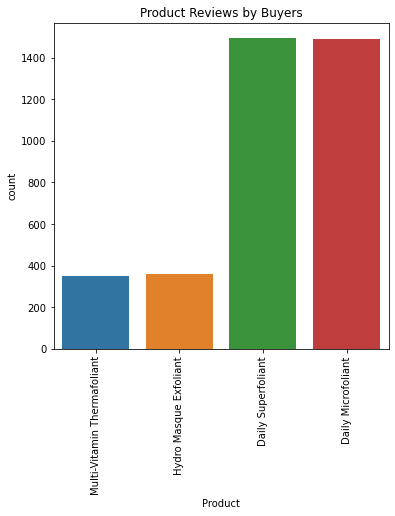

In [32]:
# This show that the buyers loved the product they purchased according to the reviews

plt.figure(figsize=(6, 6))
sns.countplot(x=df["Product"])
plt.xticks(rotation=90)
plt.title("Product Reviews by Buyers")
plt.show()

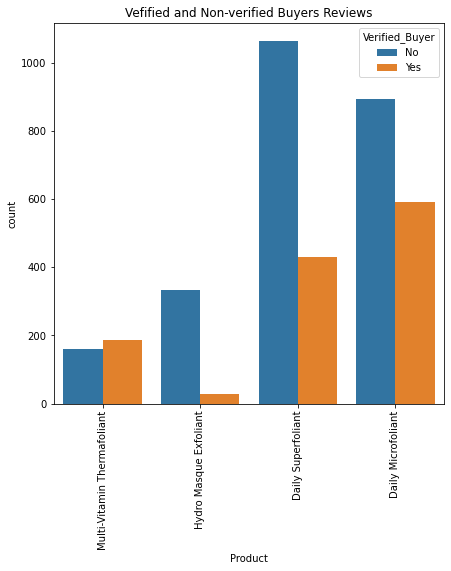

In [33]:
# Nuber of reviwes by verified buyers against non-verified buyers

plt.figure(figsize=(7, 7))
sns.countplot(x=df["Product"], hue=df["Verified_Buyer"])
plt.xticks(rotation=90)
plt.title("Vefified and Non-verified Buyers Reviews")
plt.show()

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [ ]:
from PIL import Image, ImageDraw, ImageFont

# create image object
image = Image.new(mode="RGB", size=(200, 200), color=(255, 255, 255))

# create drawing object
draw = ImageDraw.Draw(image)

# use a TrueType font
font_path = "C:\Windows\Fonts" # replace with the path to your TrueType font
font = ImageFont.truetype(font_path, size=20)

# draw text on image
text = "Hello, world!"
text_size = draw.textsize(text, font=font)
text_position = ((image.width - text_size[0]) // 2, (image.height - text_size[1]) // 2)
draw.text(text_position, text, font=font, fill=(0, 0, 0))

# show image
image.show()

In [41]:
# Total words in the

text_1 = " ".join(review for review in df.Cleaned_Review_Text)
print(
    "There are {} words in the combination of all the review text after lemmatizing.".format(
        len(text_1)
    )
)

There are 902268 words in the combination of all the review text after lemmatizing.


In [42]:
df.Product.unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "Hydro Masque Exfoliant",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [ ]:
# Creating the object of the pipeline.

sentiment_pipeline = pipeline("sentiment-analysis")

In [ ]:
# the task to be performed is passed as an argumen

data = list(df['Cleaned_Review_Text'])
Rev_text_sent_anly = sentiment_pipeline(data)
Rev_text_sent_anly

In [ ]:
# Creating a dataframe for the sentiment analysis performed

Text_sent_df = pd.DataFrame(Rev_text_sent_anly)
Text_sent_df

In [ ]:
# Grouping the analysed label result

Lab_sent_count = Text_sent_df.groupby(['label']).size()
print(Lab_sent_count)

In [ ]:
# Creating a pie chart plot for the analysed result

fig = plt.figure(figsize=(5,5), dpi=100)
AX = plt.subplot(111)
Lab_sent_count.plot.pie(ax=AX, autopct='%1.1f%%', startangle=270, fontsize=10, label="")
plt.show()

In [ ]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

# Target
TARGET = "label"
TEST_SIZE = 0.1
RANDOM_STATE = 123

X = df["Cleaned_Review_Text"]
y = Text_sent_df[TARGET]

# Split data
X_train, x_validate, y_train, y_validate = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, x_validate.shape

In [ ]:
# Checking the split X_train

X_train.head()

In [ ]:
# Checking the split y_train

y_train.head()

In [ ]:
# Plotting a countplot of the analysed result

df = pd.concat([X_train, y_train], axis="columns")

# Distribution of the target. It is fairly balanced.
sns.countplot(x=TARGET, data=df, color="g")
plt.title(f"Distribution of {TARGET!r}", size=15)
plt.tight_layout()
plt.show()

In [ ]:
# Preprocess the text

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Counting the words
X_tr_new = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)

X_tr_new 

In [ ]:
# Train the model

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_tr_new, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr_new, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")